In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import pickle
from math import log
from generate_patients import Patient
from IPython.core.display import display, HTML
from matplotlib.colors import BoundaryNorm, Normalize
import seaborn as sns

In [2]:
display(HTML("<style>.container { width:90% !important; }</style>"))
plt.interactive(True)
%matplotlib inline
plt.rcParams['figure.figsize'] = [26, 6]

In [3]:
def normalize(a):
    x = np.log(a)
    return np.array((x - np.min(x)) / (np.max(x) - np.min(x)))

In [4]:
with open('patients.obj', 'rb') as patients_file:
    patients = pickle.load(patients_file)
    
print(len(patients))

79


In [5]:
n = 5  # Patient number

# Print patient's features
print('ID: %s' % patients[n].features[0])
print('pse: %s' % patients[n].features[1])
print('psp1: %s' % patients[n].features[2])
print('psp2: %s' % patients[n].features[3])
print('psp3: %s' % patients[n].features[4])
print('pspf1: %s' % patients[n].features[5])
print('pspf2: %s' % patients[n].features[6])
print('pspf3: %s' % patients[n].features[7])
print('wpsp: %s' % patients[n].features[8])
print('cpt: %s' % patients[n].features[9])
print('faller: %s' % patients[n].features[10])
print('faller_3M: %s' % patients[n].features[11])
print('faller_6M: %s' % patients[n].features[12])
print('faller_9M: %s' % patients[n].features[13])
print('faller_12M: %s' % patients[n].features[14])
print('age: %s' % patients[n].features[15])

ID: 6.0
pse: 4.063918169554151
psp1: 6.795563843884896
psp2: 0.29662611930713867
psp3: 0.14948479967869435
pspf1: 9.0
pspf2: 21.0
pspf3: 24.0
wpsp: 54.364510751079166
cpt: 0.014531368203218875
faller: -1.0
faller_3M: 0.0
faller_6M: 0.0
faller_9M: 0.0
faller_12M: 0.0
age: 0.0


# Whole data

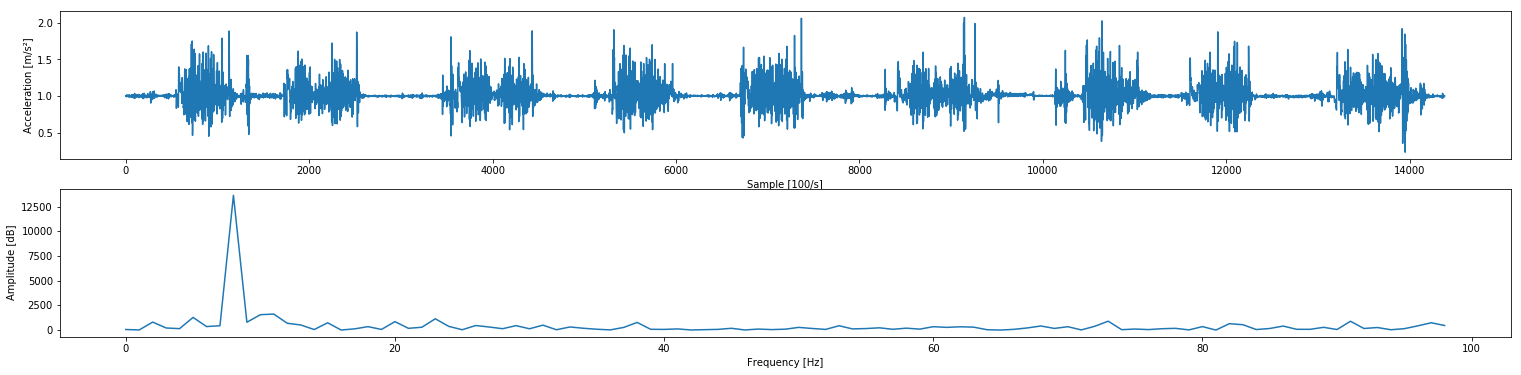

In [6]:
plt.subplot(211)
plt.plot(patients[n].data)
plt.ylabel('Acceleration [m/s²]')
plt.xlabel('Sample [100/s]')

plt.subplot(212)
plt.plot(patients[n].fft)
plt.ylabel('Amplitude [dB]')
plt.xlabel('Frequency [Hz]')

plt.show()

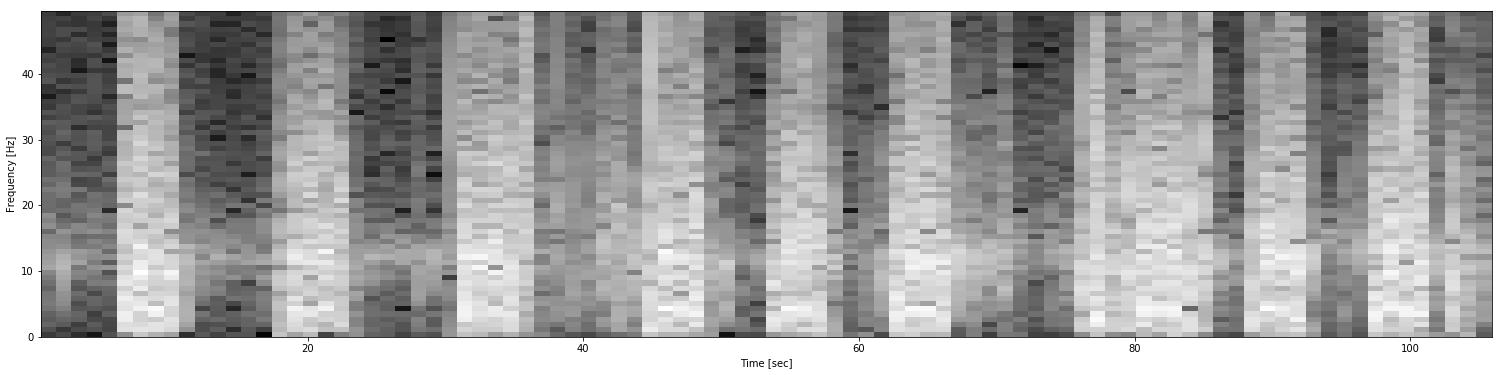

In [7]:
f, t, Sxx = signal.spectrogram(patients[0].data, fs=100, nperseg=127)

plt.pcolormesh(t, f, np.log(Sxx), cmap="gray", norm=Normalize.autoscale(Normalize, Sxx))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [8]:
x, y, specgrams = [], [], []
for patient in patients:
    _, _, Sxx = signal.spectrogram(patient.data, fs=100, nperseg=127)
    a = normalize(Sxx)
    if a.shape[1] >= 68:
        specgrams.append(a)
        y.append(a.shape[0])
        x.append(a.shape[1])

print(sorted(y))
print(sorted(x))

try:
    with open('spectrograms.obj', 'wb') as specgram_file:
        pickle.dump(specgrams, specgram_file)

except Exception as e:
    print('ERROR: ' + str(e))

[64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
[68, 70, 71, 74, 75, 76, 76, 77, 77, 78, 78, 79, 79, 79, 80, 80, 81, 81, 81, 82, 82, 83, 84, 84, 84, 84, 85, 85, 85, 86, 86, 87, 87, 87, 88, 88, 88, 89, 89, 90, 90, 90, 90, 91, 92, 92, 92, 94, 95, 95, 95, 96, 97, 97, 98, 98, 98, 100, 100, 102, 103, 104, 106, 107, 107, 107, 108, 112, 115, 117, 118, 119, 121, 122, 128, 145, 156, 159]


# Segmented TUGS (some patients have less than 9 TUGs)

In [9]:
valid_patients = [patient for patient in patients if patient.features[10] >= 0 and len(patient.tugs) == 9]  # Remove excluded patients and patients with less than 9 TUGs

print('Total patients: %s' % len(patients))
print('Wrong patients: %s' % (len(patients) - len(valid_patients)))
print('Valid patients: %s' % len(valid_patients))

Total patients: 79
Wrong patients: 7
Valid patients: 72


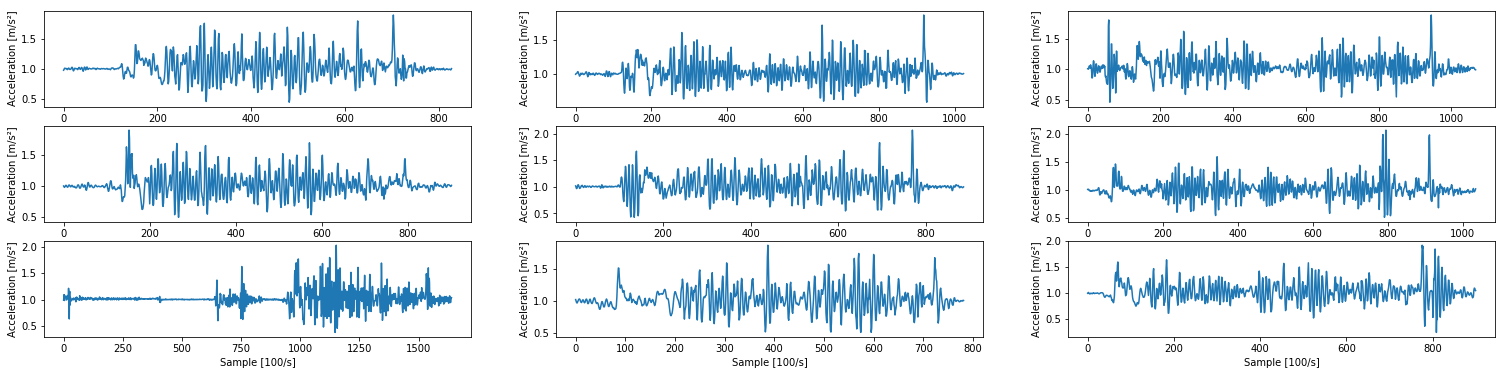

In [10]:
for i in range(9):
    tug_begin = patients[n].tugs[i][0]
    tug_end = patients[n].tugs[i][1]
    plt.subplot(3, 3, i+1)
    plt.plot(patients[n].data[tug_begin:tug_end])
    plt.ylabel('Acceleration [m/s²]')
    plt.xlabel('Sample [100/s]')

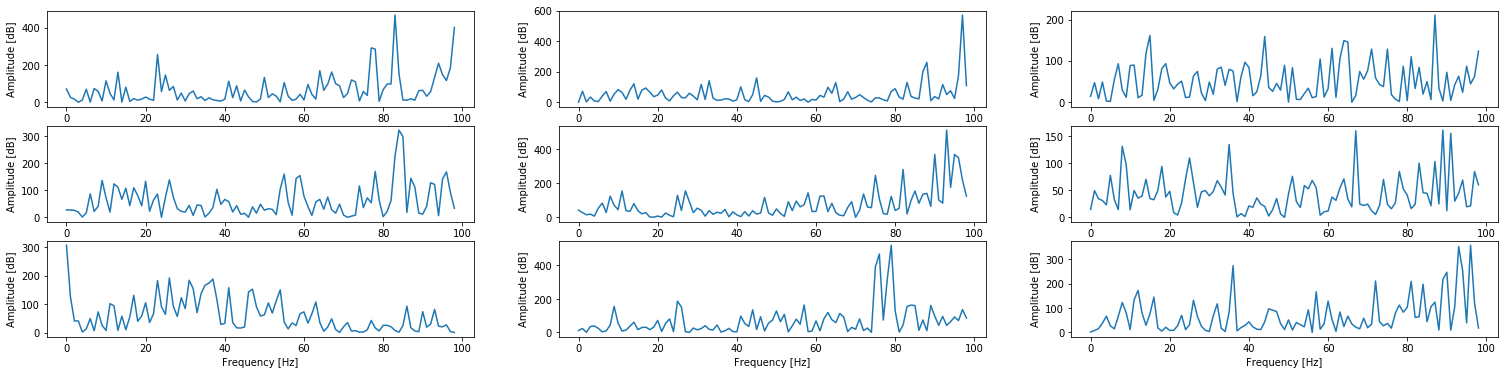

In [11]:
for i in range(9):
    tug_begin = patients[n].tugs[i][0]
    tug_end = patients[n].tugs[i][1]
    tug_fft = pow(abs(np.fft.rfft(patients[n].data[tug_begin:tug_end])), 2)[1:100]
    plt.subplot(3, 3, i+1)
    plt.plot(tug_fft)
    plt.ylabel('Amplitude [dB]')
    plt.xlabel('Frequency [Hz]')

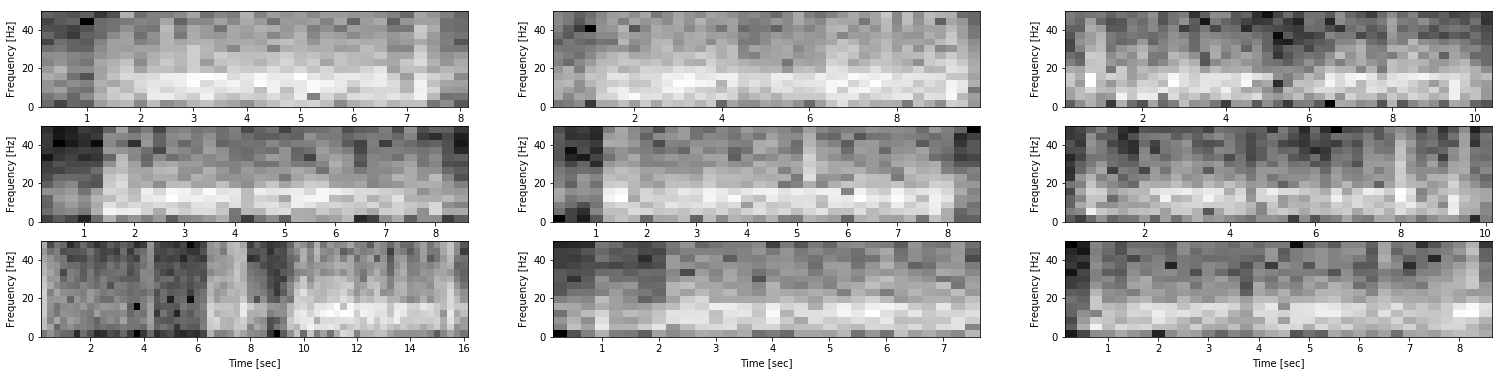

In [12]:
for i in range(9):
    tug_begin = patients[n].tugs[i][0]
    tug_end = patients[n].tugs[i][1]
    f, t, Sxx = signal.spectrogram(patients[n].data[tug_begin:tug_end], fs=100, nperseg=28)
    plt.subplot(3, 3, i+1)
    plt.pcolormesh(t, f, np.log(Sxx), cmap="gray", norm=Normalize.autoscale(Normalize, Sxx))
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')

# Concatenated Segmented TUGs

In [13]:
n = 3
concatenated = np.ndarray(0)
for i in range(9):
    tug_begin = patients[n].tugs[i][0]
    tug_end = patients[n].tugs[i][1]
    concatenated = np.append(concatenated, patients[n].data[tug_begin:tug_end])
    
f, t, Sxx = signal.spectrogram(concatenated, fs=100, nperseg=38)

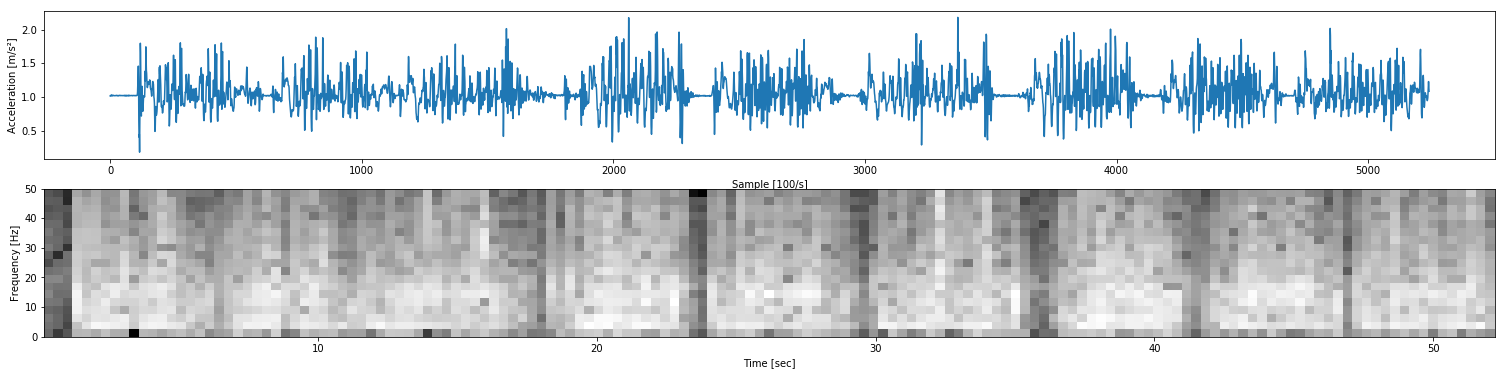

In [14]:
plt.subplot(211)
plt.plot(concatenated)
plt.ylabel('Acceleration [m/s²]')
plt.xlabel('Sample [100/s]')

plt.subplot(212)
plt.pcolormesh(t, f, np.log(Sxx), cmap="gray", norm=Normalize.autoscale(Normalize, Sxx))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

plt.show()

In [15]:
x, y, specgrams, tugs_concatenated, labels = [], [], [], [], []

for patient in valid_patients:
    concatenated = np.ndarray(0)
    for i in range(9):
        tug_begin = patient.tugs[i][0]
        tug_end = patient.tugs[i][1]
        concatenated = np.append(concatenated, patient.data[tug_begin:tug_end])
    tugs_concatenated.append(concatenated)
    labels.append(int(patient.features[10]))

max_size = 6832
modified = [np.append(signal[:6832], np.sin(0.01 * np.pi * np.arange(max_size-len(signal[:6832])) / (max_size-len(signal[:6832]))) * 0.01 + 1) for signal in tugs_concatenated]

for specgram, label in zip(modified, labels):
        _, _, Sxx = signal.spectrogram(specgram, fs=100, nperseg=38)
        a = normalize(Sxx)
        specgrams.append({'specgram':a, 'label': label})
        y.append(a.shape[0])
        x.append(a.shape[1])

print(y)
print(x)
print(labels)

try:
    with open('spectrograms_tugs.obj', 'wb') as specgram_file:
        pickle.dump(specgrams, specgram_file)

except Exception as e:
    print('ERROR: ' + str(e))

[20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20]
[200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200]
[0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0]


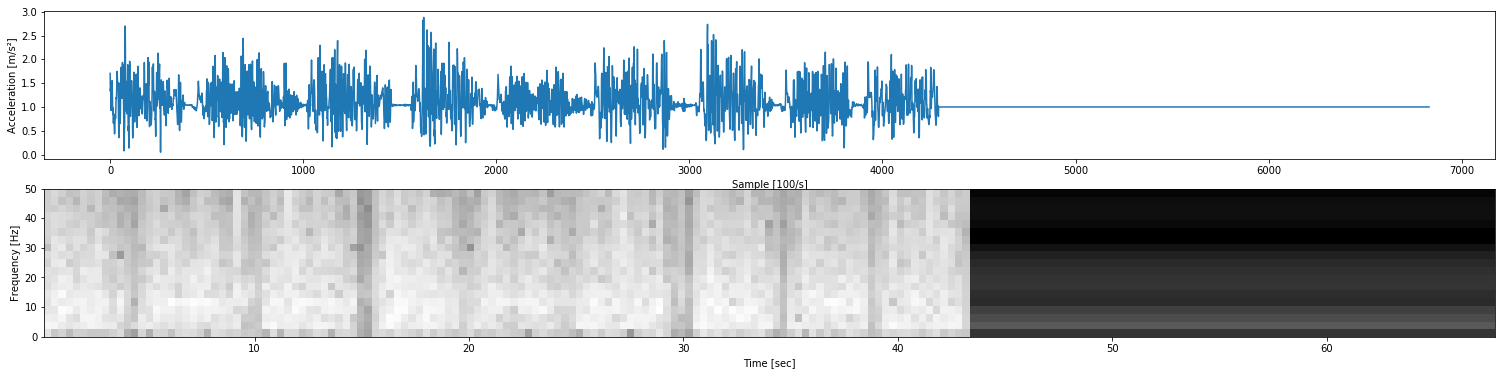

In [16]:
test = modified[1]
f, t, Sxx = signal.spectrogram(test, fs=100, nperseg=38)

plt.subplot(211)
plt.plot(test)
plt.ylabel('Acceleration [m/s²]')
plt.xlabel('Sample [100/s]')

plt.subplot(212)
plt.pcolormesh(t, f, normalize(Sxx), cmap="gray")
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

plt.show()